# ST3189 Assignment 2

10. This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolunomialFeatures
from scipy import stats

In [94]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv'
carseat = pd.read_csv(url)

In [95]:
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [96]:
carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [97]:
carseat['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [98]:
X = carseat[['Price','Urban', 'US']]
y = carseat['Sales']

In [99]:
column_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['Urban', 'US']), remainder = 'passthrough')
X = pd.DataFrame(column_transformer.fit_transform(X), columns=['Urban', 'US', 'Price'])

In [100]:
X= sm.add_constant(X)
reg1 = sm.OLS(y,X).fit()

In [101]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.39e-23
Time:                        17:43:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

In [102]:
print(mse_lin)

7.689845773576477


(b) Provide an interpretation of each coefficient in the model. Be
careful — some of the variables in the model are qualitative

The model has bad performance.  With an R-squared of 0.23 we can only explain 23% of the variance by the features selected. US is a dummy variable which takes the value of 1 when it had the value of YES and 0 for the value NO. When stores are in the US their sales are arond 1.200 more than when they are not (ceteris paribus) and we have a p value of 0.  Urban is also binary and takes 1 when it had a yes value.  It has a very high p value which indicates it is not significant.  When Urban is 1 sales go down by 21 ceteris paribus.  Price is also significant with a p value of 0, if the price increases by one sales decrease by 545.

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly

sales = 6.7262 -0.0219UrbanYes + 1.2006USYes - 0.0545Price

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

US and Price to the 1% significance level

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.


In [103]:
X = carseat[['Price', 'US']]
y = carseat['Sales']
column_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['US']), remainder = 'passthrough')
X = pd.DataFrame(column_transformer.fit_transform(X), columns=['US', 'Price'])
X= sm.add_constant(X)
reg2 = sm.OLS(y,X).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.66e-24
Time:                        17:43:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data

They fit the data badly and very similarly.  They have adjuster R-squared of 0.234 and 0.235 respectively which is low.  There is not enough information to predict the sales

Text(0.5, 1.0, 'QQ Plot for Model 2')

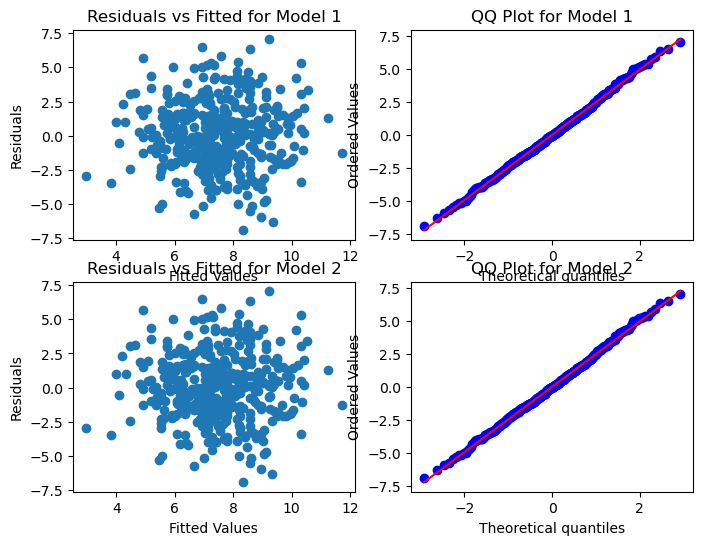

In [112]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax[0,0].scatter(reg1.fittedvalues, reg1.resid)
ax[0,0].set_xlabel('Fitted Values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('Residuals vs Fitted for Model 1')

stats.probplot(reg1.resid, plot=ax[0,1])
ax[0,1].set_title('QQ Plot for Model 1')

ax[1,0].scatter(reg2.fittedvalues, reg2.resid)
ax[1,0].set_xlabel('Fitted Values')
ax[1,0].set_ylabel('Residuals')
ax[1,0].set_title('Residuals vs Fitted for Model 2')

stats.probplot(reg2.resid, plot=ax[1,1])
ax[1,1].set_title('QQ Plot for Model 2')

No big difference also in plots to prefer one model over the other

(g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s)

In [113]:
conf_int = reg2.conf_int(alpha = 0.05)
conf_int.columns = ['2.5%', '97.5%']
conf_int['Coef'] = reg2.params
print(conf_int)

           2.5%      97.5%       Coef
const  11.79032  14.271265  13.030793
US      0.69152   1.707766   1.199643
Price  -0.06476  -0.044195  -0.054478


h) Is there evidence of outliers or high leverage observations in the
model from (e)?

There are some but not that many or that large to worry about

15. This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.


(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.


In [34]:
url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv'
boston = pd.read_csv(url)

In [35]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           5.51e-06
Time:                        16:08:30   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

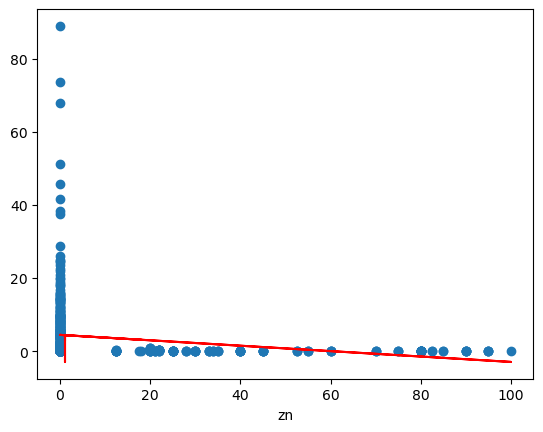

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.45e-21
Time:                        16:08:30   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0637      0.667     -3.093      0.0

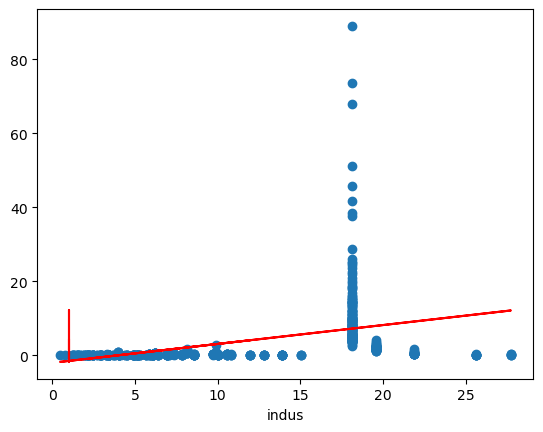

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Thu, 23 Mar 2023   Prob (F-statistic):              0.209
Time:                        16:08:30   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.0

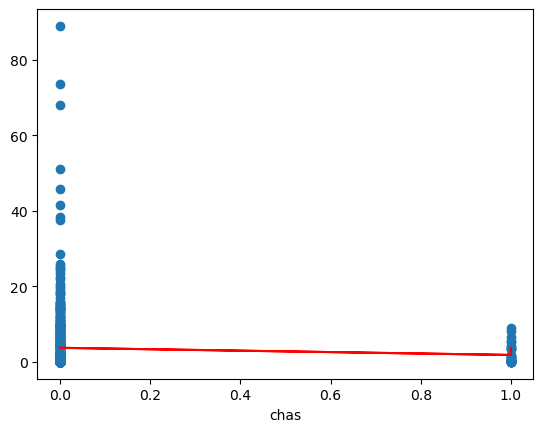

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           3.75e-23
Time:                        16:08:30   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7199      1.699     -8.073      0.0

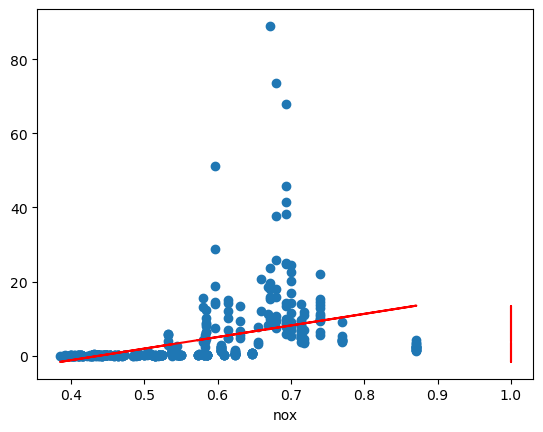

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           6.35e-07
Time:                        16:08:30   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4818      3.364      6.088      0.0

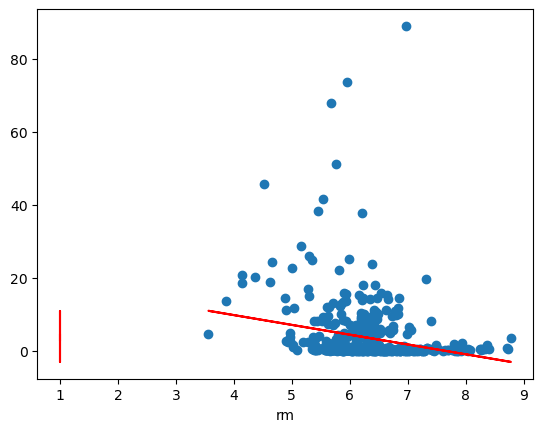

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.85e-16
Time:                        16:08:30   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7779      0.944     -4.002      0.0

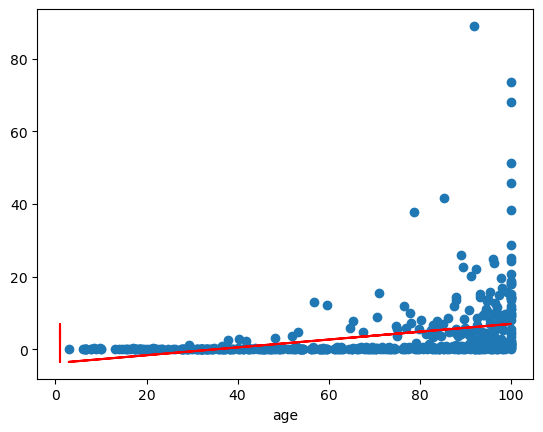

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           8.52e-19
Time:                        16:08:30   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4993      0.730     13.006      0.0

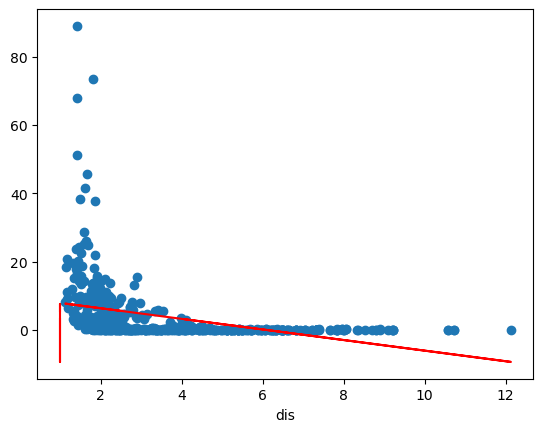

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.69e-56
Time:                        16:08:30   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2872      0.443     -5.157      0.0

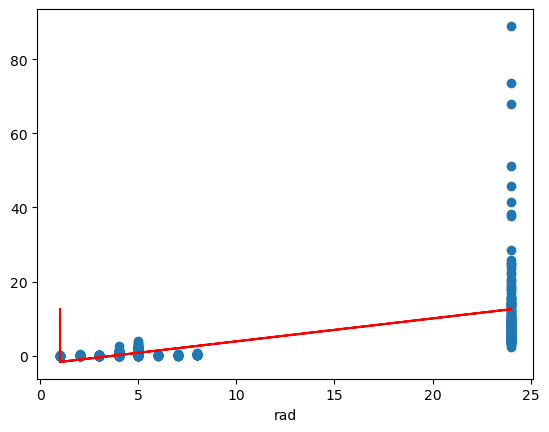

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.36e-47
Time:                        16:08:31   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5284      0.816    -10.454      0.0

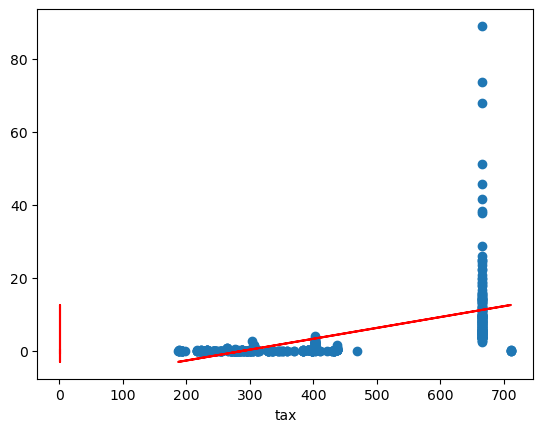

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.94e-11
Time:                        16:08:31   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147     -5.607      0.0

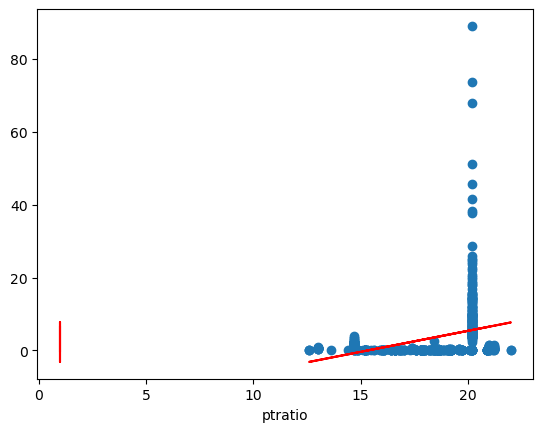

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.49e-19
Time:                        16:08:31   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5535      1.426     11.609      0.0

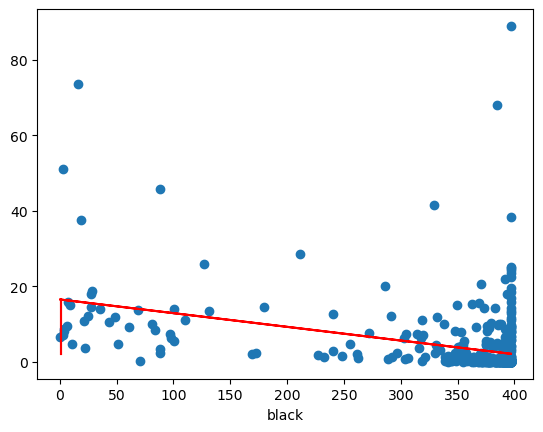

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.65e-27
Time:                        16:08:31   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3305      0.694     -4.801      0.0

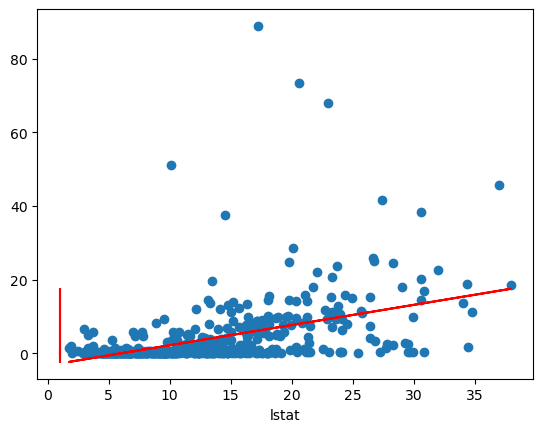

In [51]:
coef_a = []
y = boston['crim']
for i in range(1,13):
    feature_name = boston.columns[i]
    X = boston[[feature_name]]
    X= sm.add_constant(X)
    reg = sm.OLS(y,X).fit()
    coef_a.append(reg.params[1])
    print(reg.summary())
    plt.scatter(boston[feature_name], y)
    plt.plot(X, reg.predict(X), color = 'red')
    plt.xlabel(feature_name)
    plt.show()

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0:βj=0?

In [52]:
X = boston.drop('crim', axis = 1)
X= sm.add_constant(X)
reg = sm.OLS(y,X).fit()
print(reg.summary())
coef_b = reg.params[1:13]

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.57e-56
Time:                        16:08:31   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

We can reject the null at the 1% level for predictors dis, rad, medv as their p values are below 0.01

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

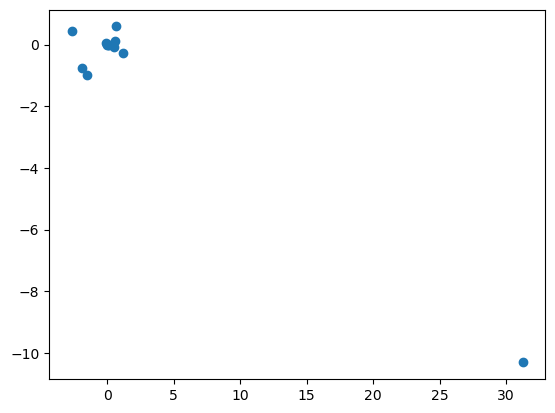

In [53]:
plt.scatter(coef_a,coef_b)
plt.show()

The results from (a) can be significantly different from (b) - see in particular the nox variable. This is because including more predictors in a linear regression can change substantially how we measure the relation between the dependent and independent variables, especially if the additional predictors are significant. For exmple, the inclusion of significant predictors can make ex-ante significant variables to be insignificant.

In [54]:
coef_a = np.delete(coef_a,3)
coef_b =coef_b.drop('nox')


array([-0.07393498,  0.50977633, -1.89277655, -2.68405122,  0.10778623,
       -1.55090168,  0.61791093,  0.02974225,  1.15198279, -0.03627964,
        0.54880478])

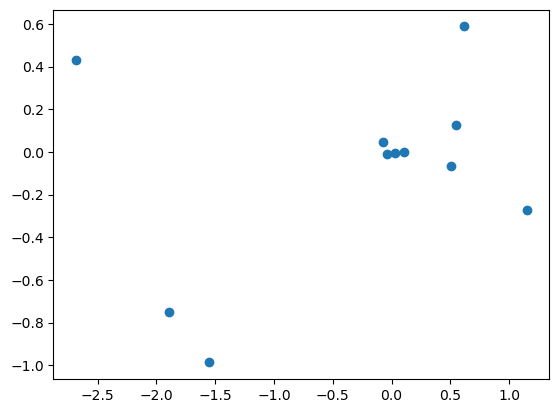

In [59]:
plt.scatter(coef_a, coef_b)

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y
=β0+β1X+β2X2+β3X3+ε

In [70]:
features = boston.drop('crim', axis= 1).columns

# Fit a model for each feature with polynomial terms up to the third degree
for feature in features:
    # Create the polynomial terms
    df_poly = pd.DataFrame()
    df_poly[feature] = boston[feature]
    df_poly[feature + '_2'] = boston[feature]**2
    df_poly[feature + '_3'] = boston[feature]**3
    
    # Fit the multiple linear regression model
    X_poly = sm.add_constant(df_poly)
    model = sm.OLS(y, X_poly).fit()
    
    # Print the results
    print(f'Feature: {feature}')
    print(model.summary())

Feature: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.28e-06
Time:                        16:22:33   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     11.

There is evidence of non linear association in various cases for example indus has p values of 0 for all of the three coefficients